# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

# set up lists to hold reponse info
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
city_error_list = []

x = 0
print("Begin requesting city weather data:")
print("")

for city in cities:
# Get weather data
    try:
        response = requests.get(query_url + city).json()

        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])

        x += 1
    except:
        print( x, end = ":")
        print(city, end=" ")
        city_error_list.append(city)

for city in city_error_list:
    cities.remove(city)


print("")
print("Done!")

259:samusu 343:dzhusaly 386:sorvag 386:camana 410:abiy adi 529:olafsvik 
Done


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_data.to_csv("city_weather_data.csv", encoding="utf-8", index=False)

weather_dict = {
    "City": cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,sabang,98,PH,1566749465,89,13.80,121.11,79.00,5.01
1,mataura,100,NZ,1566749465,97,-46.19,168.86,44.01,1.01
2,balagunan,90,PH,1566749465,88,7.49,125.52,78.80,3.53
3,punta arenas,0,CL,1566749466,70,-53.16,-70.91,48.00,13.87
4,vaini,40,IN,1566749466,88,15.34,74.49,71.60,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

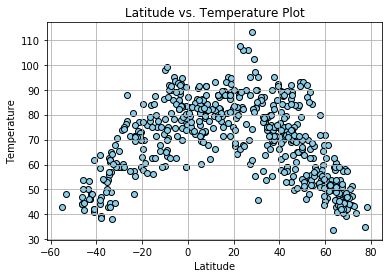

In [15]:
x_axis = weather_data["Lat"]
data = weather_data["Max Temp"]
plt.scatter(x_axis,data,marker='o',facecolors='Skyblue',edgecolors='black')

plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)

# Save Figure
plt.savefig("lat_vs_temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

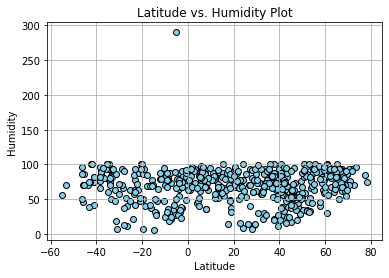

In [16]:
x_axis = weather_data["Lat"]
data = weather_data["Humidity"]
plt.scatter(x_axis,data,marker='o',facecolors='Skyblue',edgecolors='black')

plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save Figure
plt.savefig("lat_vs_humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

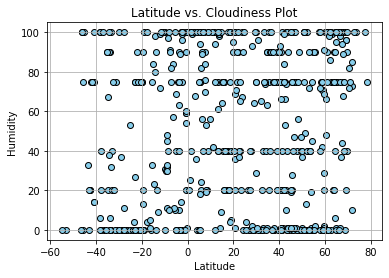

In [17]:
x_axis = weather_data["Lat"]
data = weather_data["Cloudiness"]
plt.scatter(x_axis,data,marker='o',facecolors='Skyblue',edgecolors='black')

plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save Figure
plt.savefig("lat_vs_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

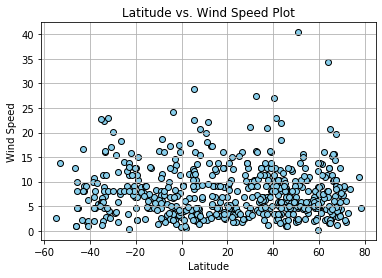

In [18]:
x_axis = weather_data["Lat"]
data = weather_data["Wind Speed"]
plt.scatter(x_axis,data,marker='o',facecolors='Skyblue',edgecolors='black')

plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save Figure
plt.savefig("lat_vs_wind_speed.png")

# Show plot
plt.show()